#Neural Network Classification with TensorFlow

A classification problem involves predicting whether something is one thing or another.
for example, you might want to:

Predict whether or not someone has heart disease based on their health parameters. This is called binary classification since there are only two options.

Decide whether a photo of is of food, a person or a dog. This is called multi-class classification since there are more than two options.

Predict what categories should be assigned to a Wikipedia article. This is called multi-label classification since a single article could have more than one category assigned.



# Typical architecture of a classification neural network

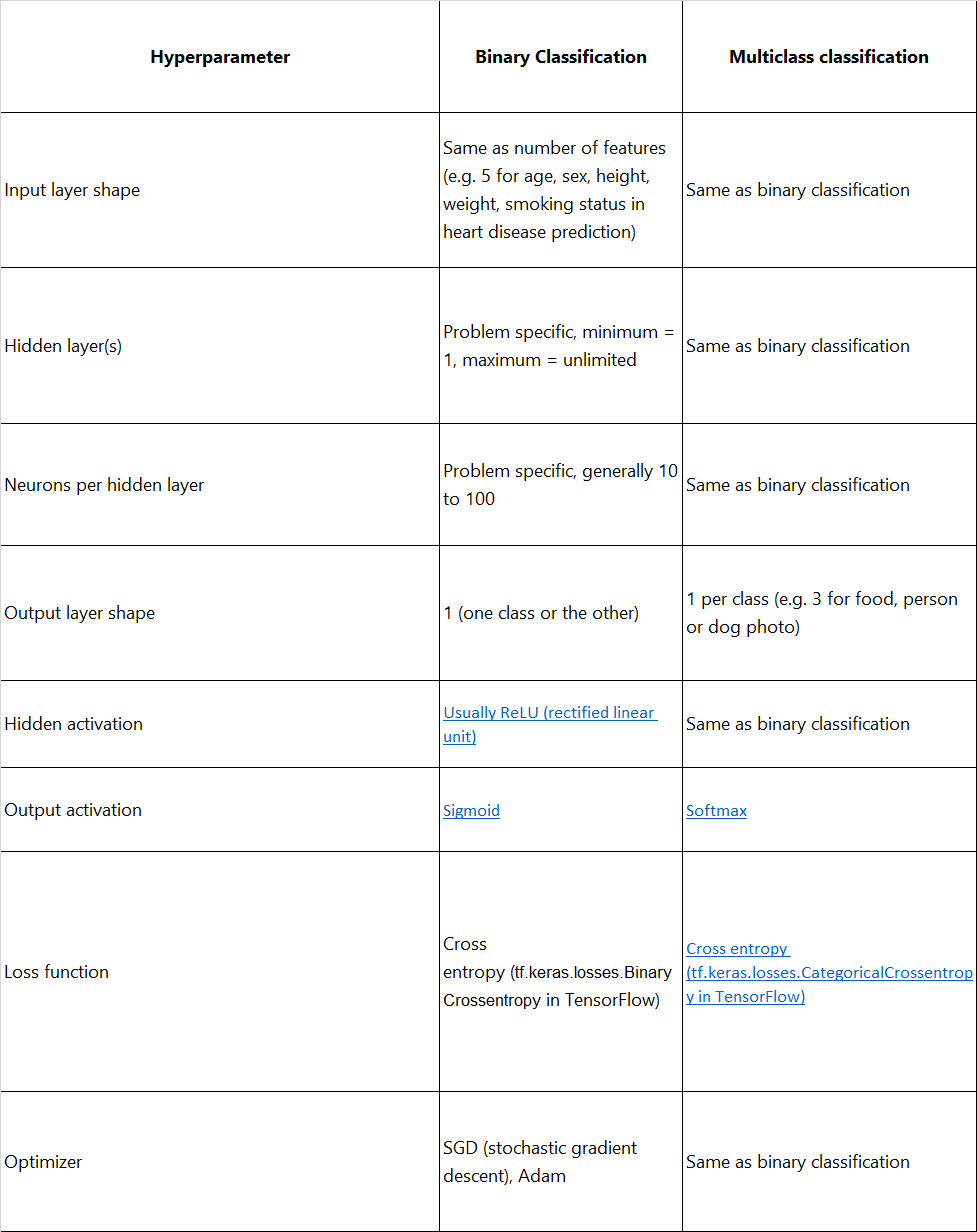

In [1]:
import tensorflow as tf
import numpy as np



# Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples=1000

# Create circles
X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [3]:
X


array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
# Make dataframe of features and labels
import pandas as pd
circles=pd.DataFrame({'X0':X[:,0],"X1":X[:,1],"label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


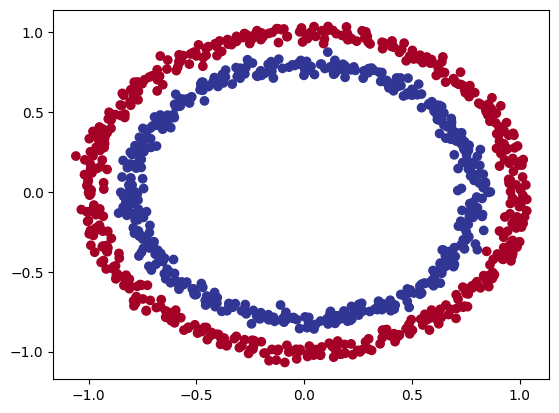

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)


# Input and output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:

# Check how many samples we have
len(X), len(y)

(1000, 1000)

In [ ]:

# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [ ]:
# Create the model

#Set random seed
tf.random.set_seed(42)

#1. Create the model
model1=tf.keras.Sequential([tf.keras.layers.Dense(1)])

#2. Compile the model
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

#3. Fit the model

model1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 3.5191 - accuracy: 0.4730
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7348 - accuracy: 0.5050
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7036 - accuracy: 0.4960
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6970 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4890


In [ ]:
# Training the model for longer
model1.fit(X,y,epochs=200, verbose=0)

In [ ]:
#Evaluate
model1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [ ]:
#Improving the model

#set random seed
tf.random.set_seed(42)

#1 Creating the model
model2=tf.keras.Sequential([tf.keras.layers.Dense(100),
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(1)
                            ])
#2 Compile
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

#3 Fit the model
model2.fit(X,y,epochs=100,verbose=0)

In [ ]:
# Evaluate the model
model2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.5040


[0.6986218690872192, 0.5040000081062317]

In [ ]:
 model2.output_shape[-1]

1

In [16]:
# to visualize the model's predictions we're going to create a function plot_decision_boundary()

def plot_decision_boundary(model,X,y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min,x_max=X[:,0].min()-0.1,X[:,0].max()+0.1
  y_min,y_max=X[:,1].min()-0.1,X[:,1].max()+0.1
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))

  #Create X values
  x_in=np.c_[xx.ravel(),yy.ravel()] #stack 2D arrays together

  # Make predictions
  y_pred=model.predict(x_in)

  # Check for multi-class
   # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())



313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


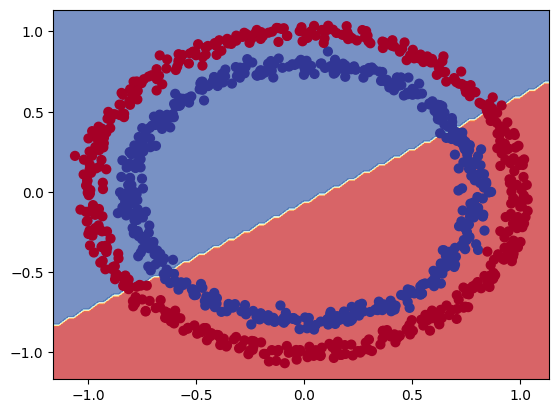

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model2,X,y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model2.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int64)
      • training=True
      • mask=None


In [ ]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100, verbose=0)

2/2 [==============================] - 0s 5ms/step


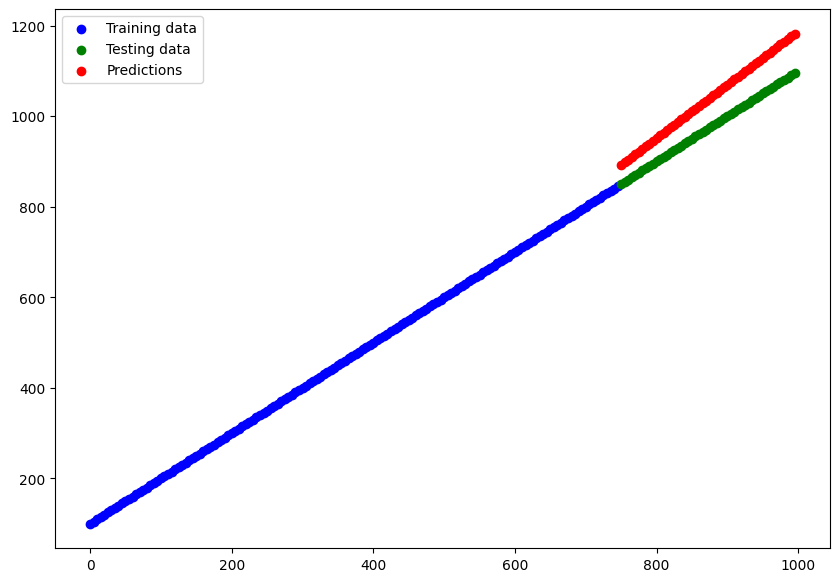

In [ ]:

# Make predictions with our trained model
y_reg_preds = model3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

#The missing piece: Non-linearity

add to models we've built before is the use of the activation keyword.

In [13]:
# model with activation linear

# Setup random seed

tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100,verbose=0)

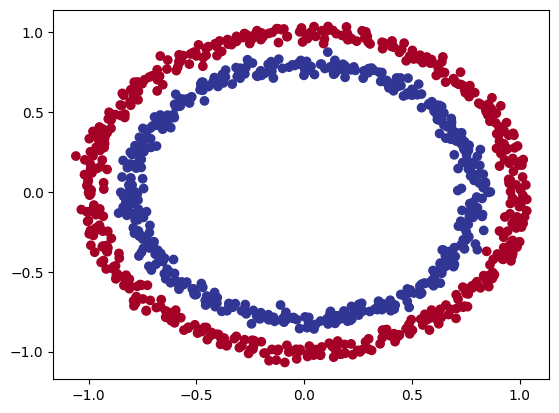

In [14]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


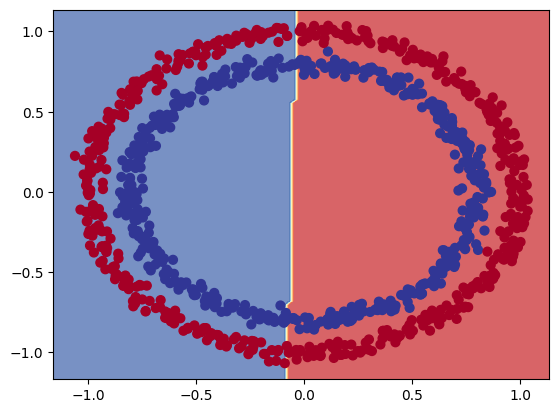

In [17]:

# Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_4, X, y)

In [20]:
# change the activation function on our output layer too

# Set random seeds

tf.random.set_seed(42)

# 1. Create the model
model5=tf.keras.Sequential([tf.keras.layers.Dense(10,activation='relu'),
                            tf.keras.layers.Dense(10,activation='relu'),
                            tf.keras.layers.Dense(1,activation='sigmoid')])

#2. Compile the model
model5.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])
#3. Fit the model
history=model5.fit(X,y, epochs=250, verbose=0)

In [21]:
model5.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 1.0000


[0.003166966140270233, 1.0]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


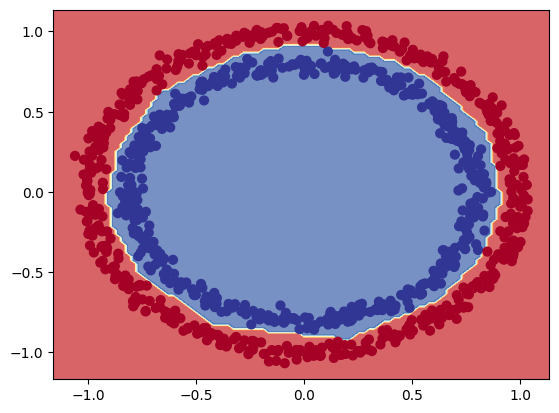

In [22]:
plot_decision_boundary(model5,X,y)

In [23]:

# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

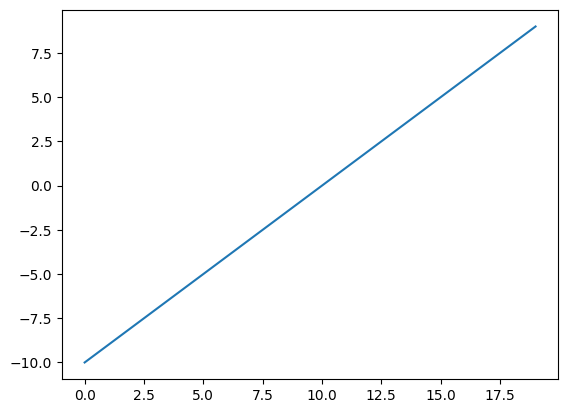

In [24]:
# Visualize our toy tensor
plt.plot(A);

In [25]:
# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

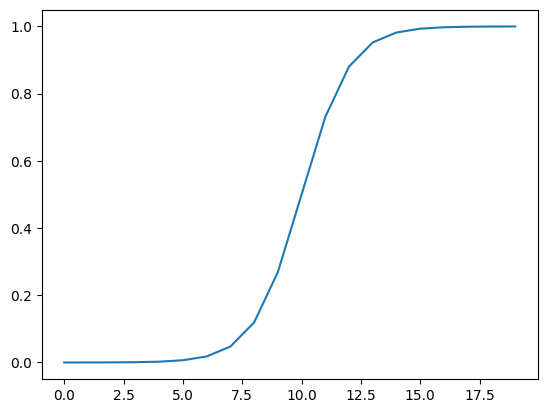

In [26]:
# Plot sigmoid modified tensor
plt.plot(sigmoid(A));

In [27]:
# ReLU - https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu
def relu(x):
  return tf.maximum(0, x)

# Pass toy tensor through ReLU function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

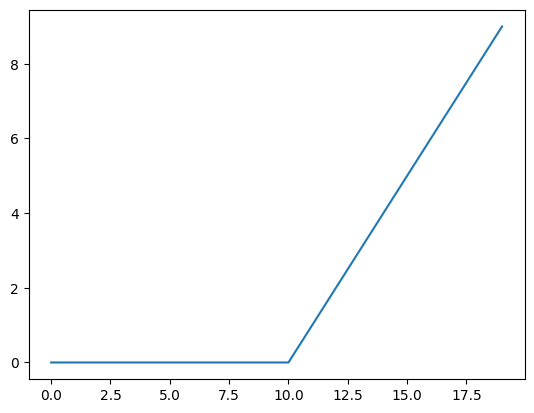

In [28]:

# Plot ReLU-modified tensor
plt.plot(relu(A));

# Evaluating and improving our classification model